In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("main.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format
df.set_index('Date', inplace=True)  # Set Date as index

In [5]:
# Display dataset information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    2009 non-null   float64
 2   NO2     2009 non-null   float64
 3   CO      2009 non-null   float64
 4   SO2     2009 non-null   float64
 5   O3      2009 non-null   float64
 6   tavg    2009 non-null   float64
 7   rh      2009 non-null   float64
 8   wspd    2009 non-null   float64
 9   AQI     2009 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB
None


In [6]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
tavg     0
rh       0
wspd     0
AQI      0
dtype: int64


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             PM2.5         PM10          NO2           CO          SO2  \
count  2009.000000  2009.000000  2009.000000  2009.000000  2009.000000   
mean    117.196153   232.809229    50.785182     1.976053    15.901253   
std      82.871644   119.513475    22.685415     2.560253     7.745483   
min      10.240000    18.590000    10.630000     0.000000     2.340000   
25%      57.100000   138.810000    33.900000     0.910000    10.460000   
50%      94.670000   220.560000    47.150000     1.240000    14.970000   
75%     152.990000   307.380000    63.570000     1.870000    19.360000   
max     685.360000   796.880000   162.500000    30.440000    71.560000   

                O3         tavg           rh         wspd          AQI  
count  2009.000000  2009.000000  2009.000000  2009.000000  2009.000000  
mean     51.323610    25.688435     6.313373     5.719522   259.487744  
std      25.511388     7.353942     6.586735     1.698546   119.239308  
min       6.940000  

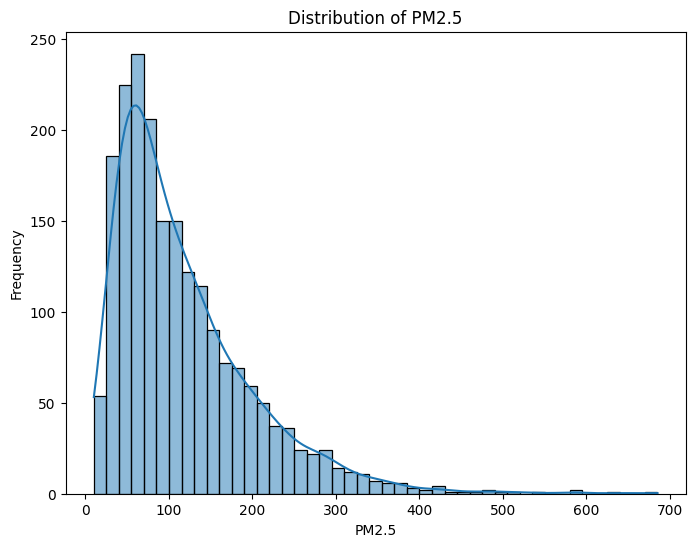

In [17]:
# Histogram for PM2.5
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="PM2.5", kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

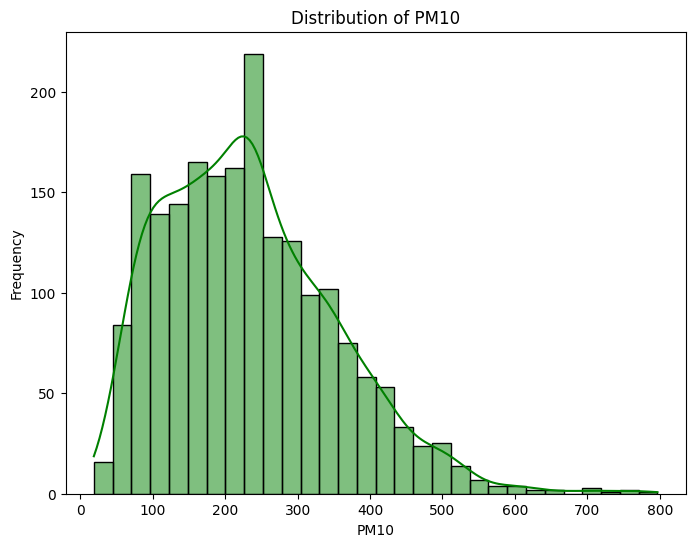

In [18]:
# Histogram for PM10
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="PM10", kde=True, color="green")
plt.title("Distribution of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.show()


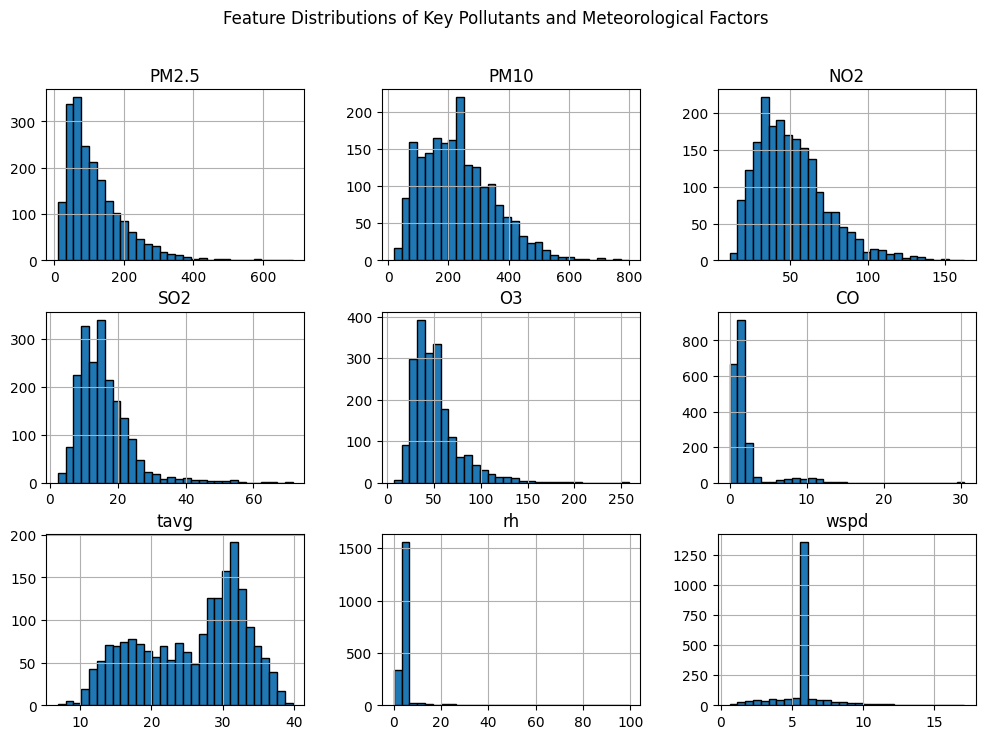

In [12]:
# List of key attributes to visualize
attributes = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO', 'tavg', 'rh', 'wspd']

# Plot histograms for each attribute
df[attributes].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions of Key Pollutants and Meteorological Factors")
plt.show()


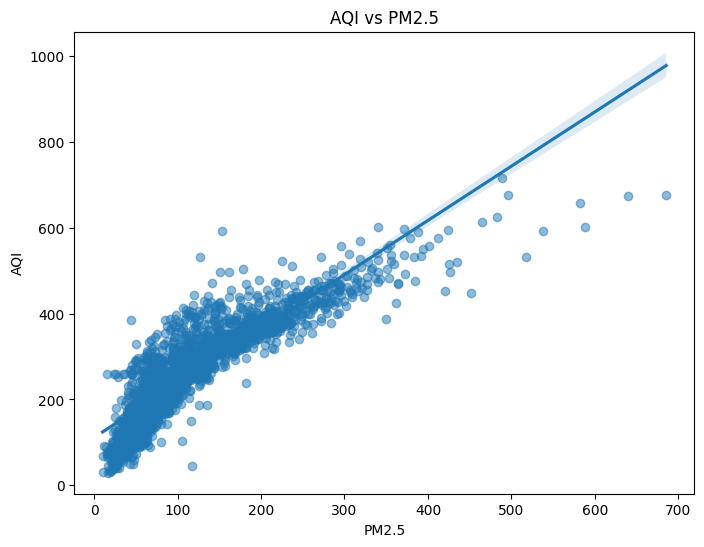

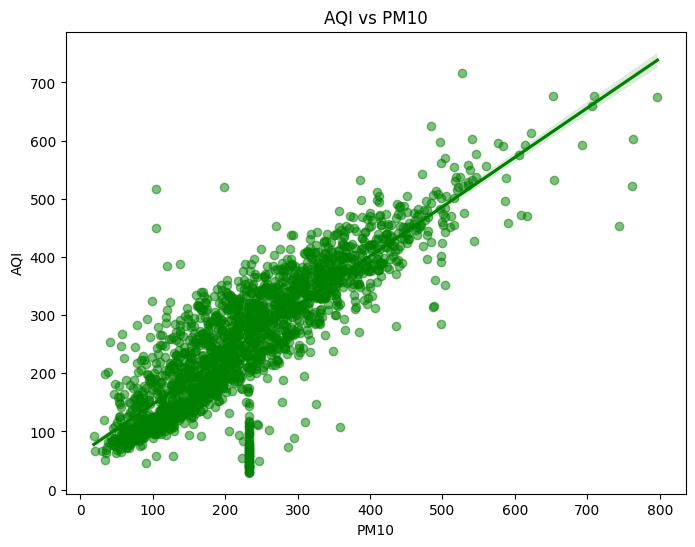

In [13]:
# 1. Scatter/Regression Plots (instead of a count-based histogram)
# Plot AQI against PM2.5
plt.figure(figsize=(8, 6))
sns.regplot(x="PM2.5", y="AQI", data=df, scatter_kws={'alpha': 0.5})
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("AQI vs PM2.5")
plt.show()

# Plot AQI against PM10
plt.figure(figsize=(8, 6))
sns.regplot(x="PM10", y="AQI", data=df, scatter_kws={'alpha': 0.5}, color="green")
plt.xlabel("PM10")
plt.ylabel("AQI")
plt.title("AQI vs PM10")
plt.show()

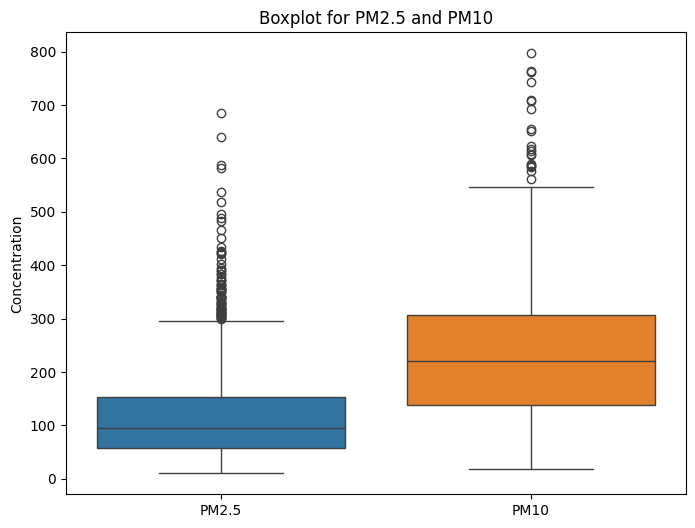

In [9]:
# Create a boxplot for PM2.5 and PM10
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['PM2.5', 'PM10']])
plt.title("Boxplot for PM2.5 and PM10")
plt.ylabel("Concentration")
plt.show()

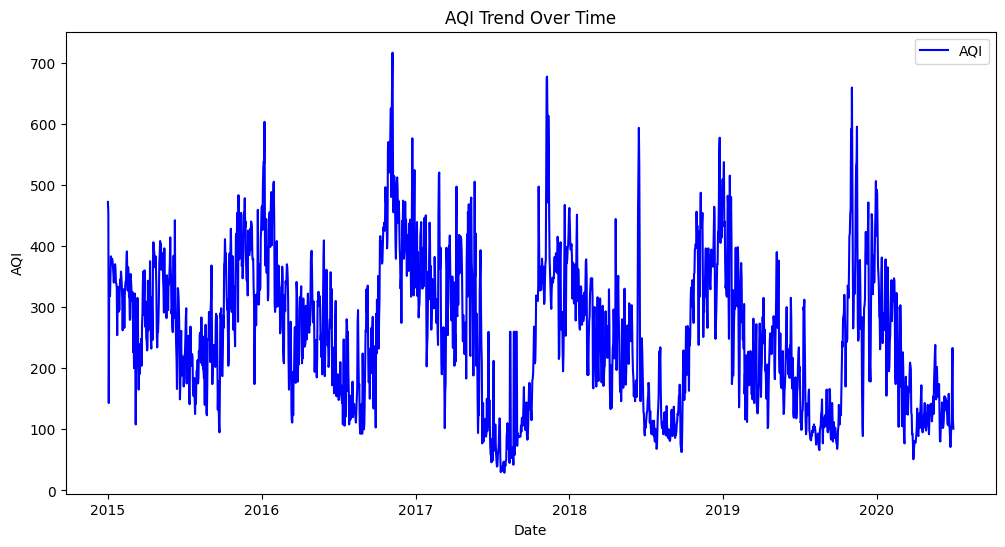

In [14]:

# Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["AQI"],label='AQI', linestyle='-', color='blue')
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Trend Over Time")
plt.legend()
plt.show()


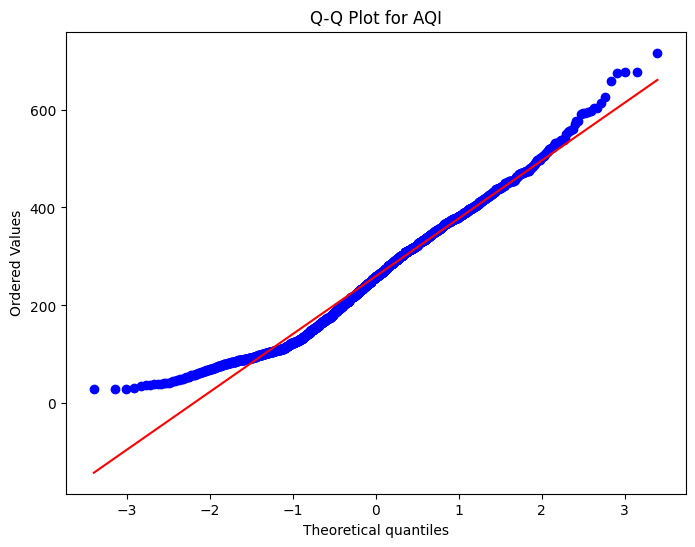

In [21]:
import scipy.stats as stats
import numpy as np

# Q-Q plot for normality check
plt.figure(figsize=(8, 6))
stats.probplot(df['AQI'], dist="norm", plot=plt)
plt.title("Q-Q Plot for AQI")
plt.show()

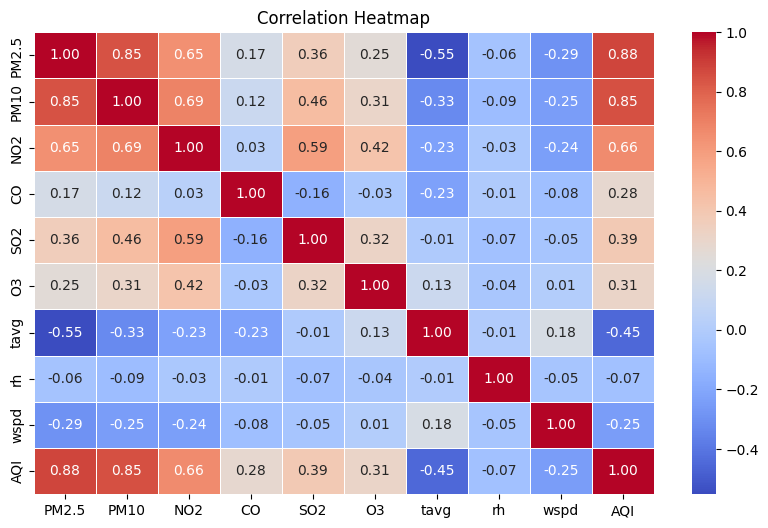

In [25]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

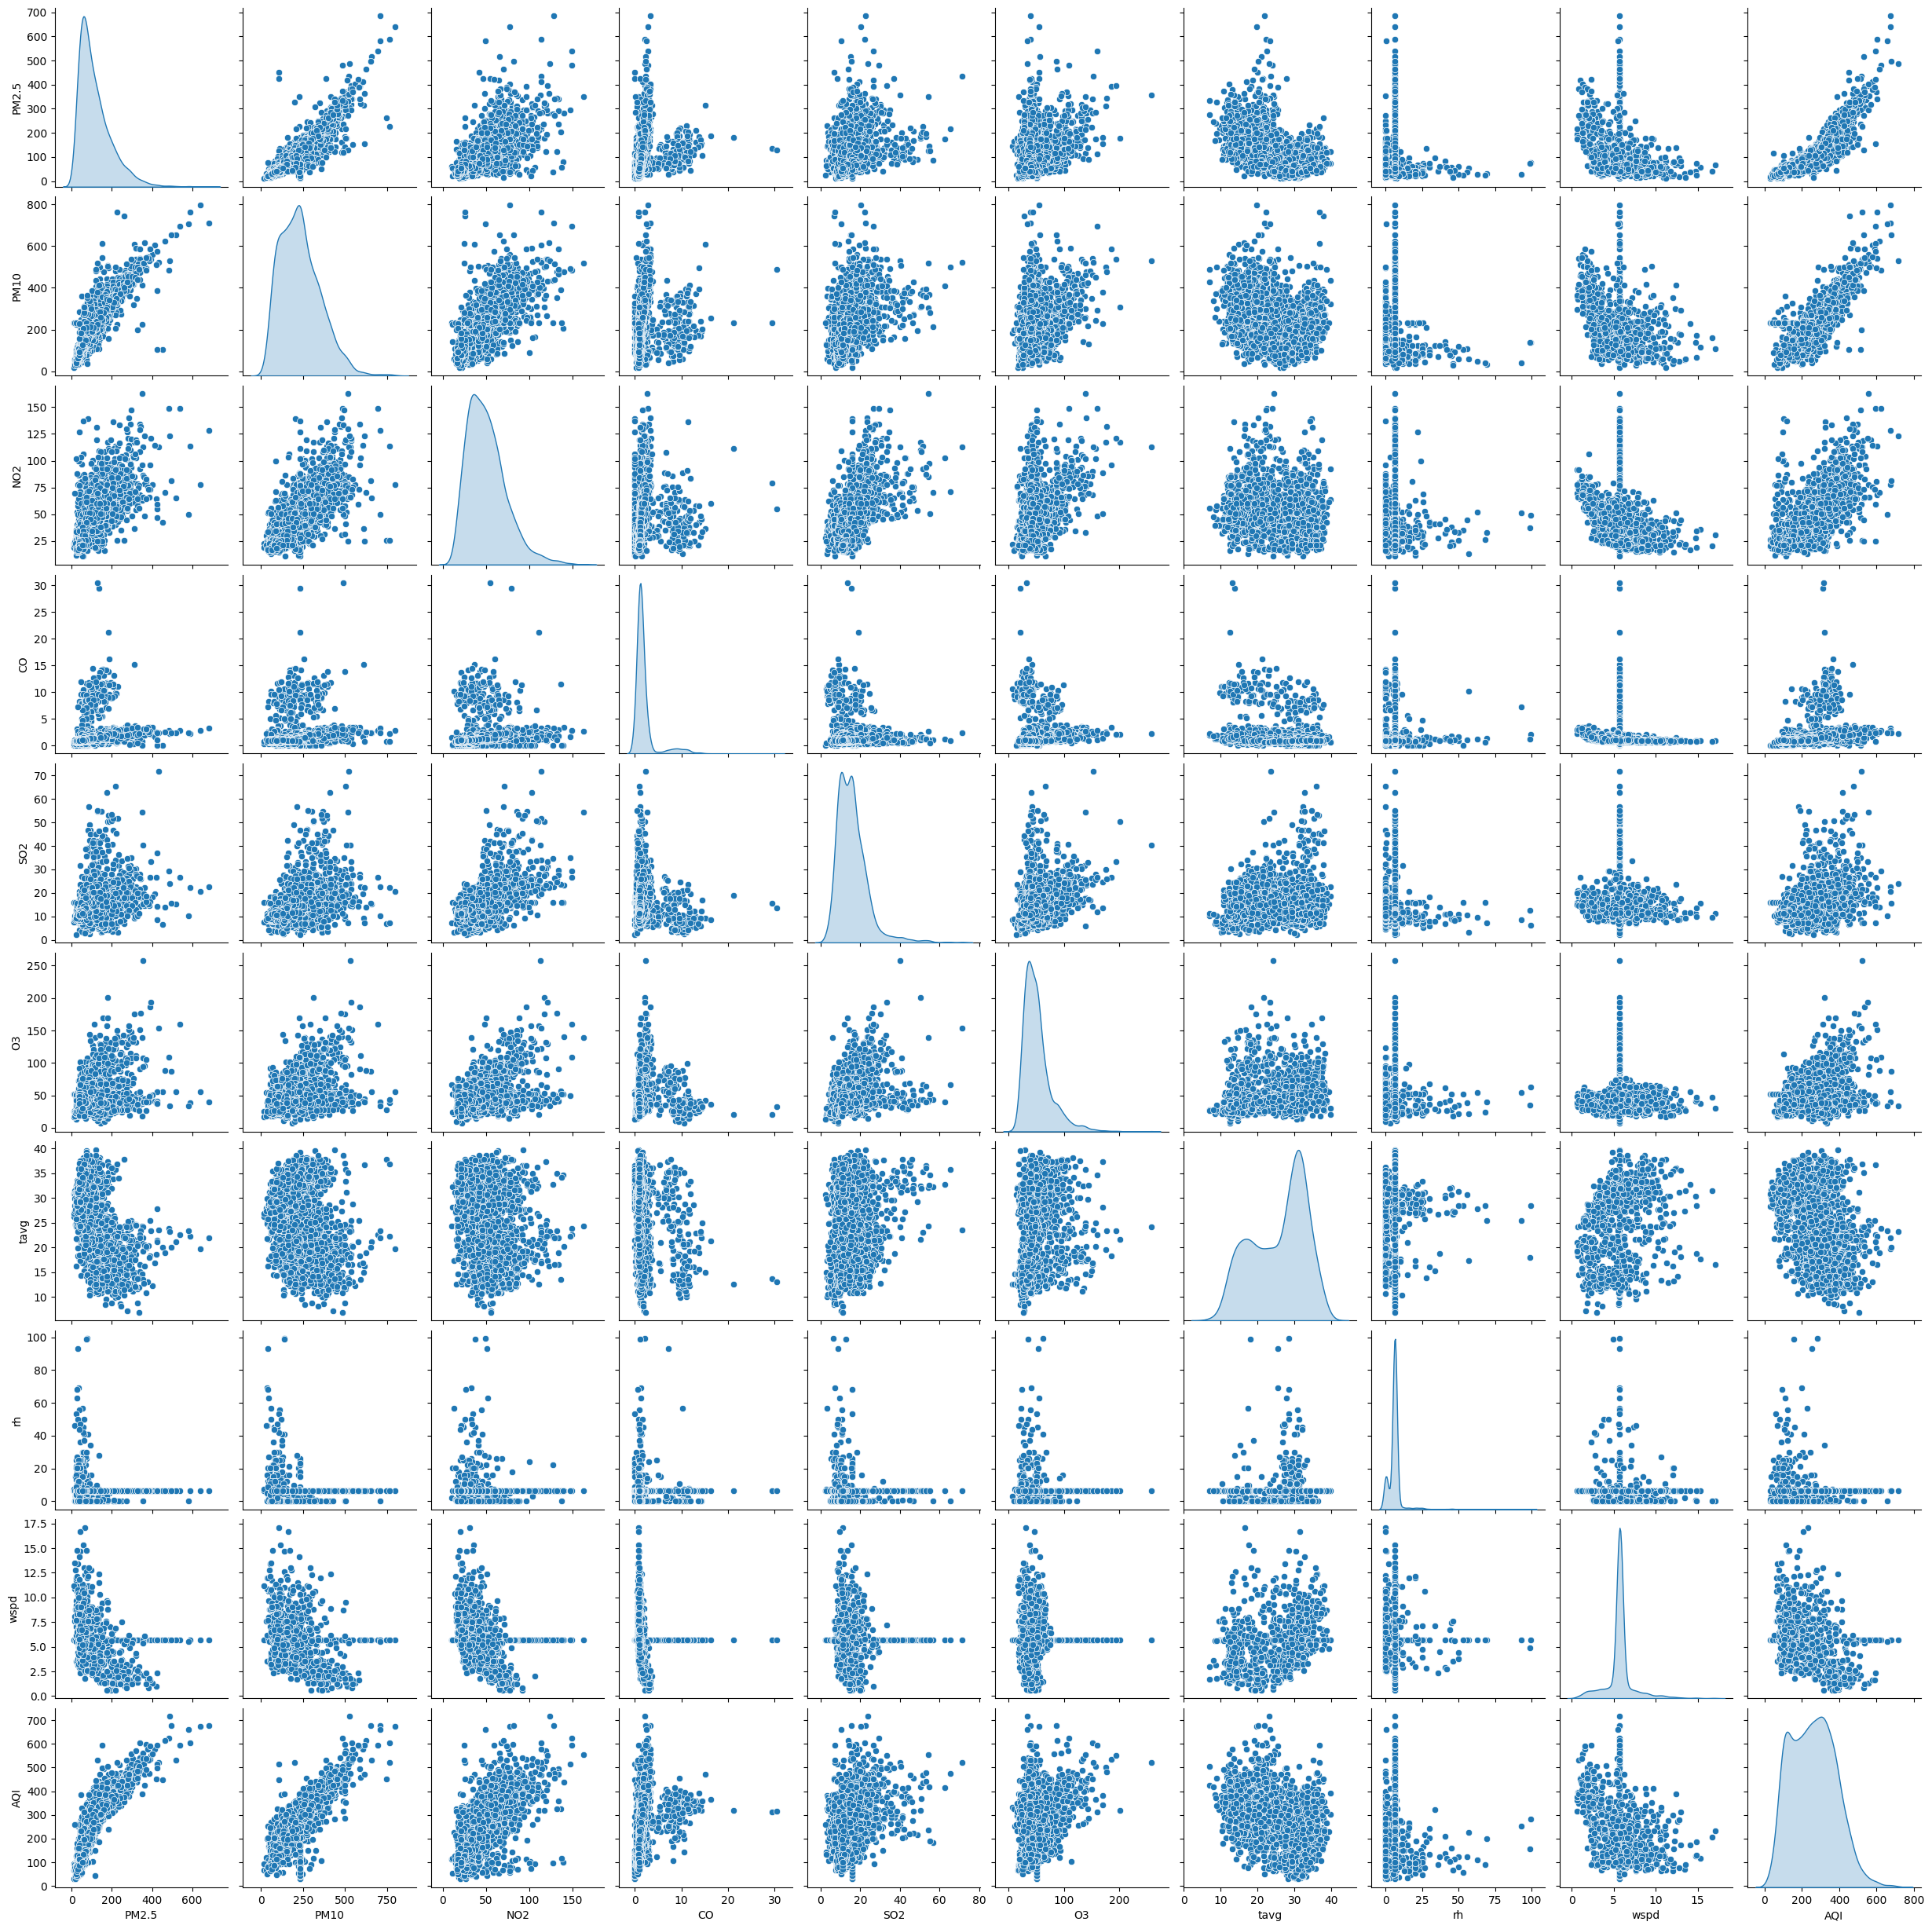

In [19]:
# Pairplot for visualizing feature relationships
sns.pairplot(df, diag_kind='kde')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\user\OneDrive - Kathmandu University (student.ku.edu.np)\Desktop\Python End Semester Project\main.csv", parse_dates=["Date"])

# Select relevant features and target variable
X = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'tavg', 'rh', 'wspd']]
y = df['AQI']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate predictions and evaluate the model
y_pred = lr.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE (compatible with all scikit-learn versions)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.8303657152141848
Root Mean Squared Error (RMSE): 48.511947893446475


In [11]:
# Print coefficients of the model
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

  Feature  Coefficient
3      CO     7.684511
8    wspd     1.404682
0   PM2.5     0.704816
4     SO2     0.495593
1    PM10     0.345204
5      O3     0.275077
2     NO2     0.274588
7      rh    -0.006147
6    tavg    -0.414937


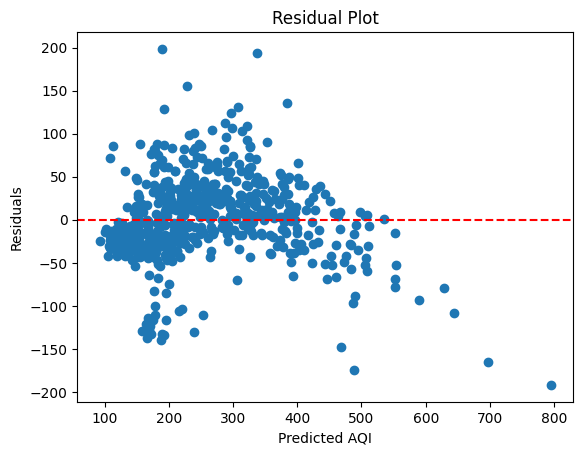

In [12]:
import matplotlib.pyplot as plt

# Plot residuals to check for patterns
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

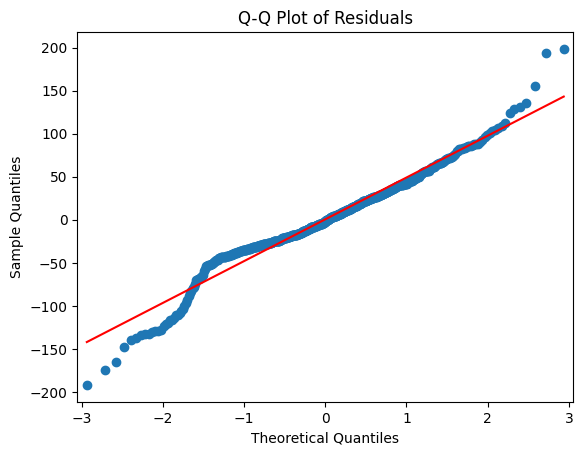

In [13]:
import statsmodels.api as sm

# Q-Q plot to check normality of residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score (Ridge): {r2_ridge}")

R² Score (Ridge): 0.8303671866937234


In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Score (Lasso): {r2_lasso}")

R² Score (Lasso): 0.8303989727797423


In [16]:
# Example input data for prediction
new_data = pd.DataFrame({
    "PM2.5": [120],
    "PM10": [200],
    "NO2": [40],
    "CO": [1.5],
    "SO2": [10],
    "O3": [50],
    "tavg": [25],
    "rh": [60],
    "wspd": [5]
})

# Predict AQI for new data
predicted_aqi = lr.predict(new_data)
print(f"Predicted AQI: {predicted_aqi[0]}")


Predicted AQI: 239.00802614229613


In [17]:
import joblib

# Save the trained model to a file
joblib.dump(lr, "aqi_prediction_model.pkl")

# Load the saved model
loaded_model = joblib.load("aqi_prediction_model.pkl")

In [18]:
import streamlit as st
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load("aqi_prediction_model.pkl")

# Title of the app
st.title("AQI Prediction App")

# Instructions for users
st.write("Enter values for the independent variables below to predict AQI.")

# Input fields for independent variables
pm25 = st.number_input("PM2.5 (µg/m³)", min_value=0.0, step=0.1)
pm10 = st.number_input("PM10 (µg/m³)", min_value=0.0, step=0.1)
no2 = st.number_input("NO₂ (ppb)", min_value=0.0, step=0.1)
co = st.number_input("CO (ppm)", min_value=0.0, step=0.1)
so2 = st.number_input("SO₂ (ppb)", min_value=0.0, step=0.1)
o3 = st.number_input("O₃ (ppb)", min_value=0.0, step=0.1)
tavg = st.number_input("Average Temperature (°C)", step=0.1)
rh = st.number_input("Relative Humidity (%)", min_value=0.0, max_value=100.0, step=1.0)
wspd = st.number_input("Wind Speed (m/s)", min_value=0.0, step=0.1)

# Button to make predictions
if st.button("Predict AQI"):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        "PM2.5": [pm25],
        "PM10": [pm10],
        "NO2": [no2],
        "CO": [co],
        "SO2": [so2],
        "O3": [o3],
        "tavg": [tavg],
        "rh": [rh],
        "wspd": [wspd]
    })

    # Make prediction using the loaded model
    predicted_aqi = loaded_model.predict(input_data)

    # Display the prediction
    st.success(f"Predicted AQI: {predicted_aqi[0]:.2f}")

2025-02-23 20:31:31.993 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:32.298 
  command:

    streamlit run c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-23 20:31:32.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:32.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:32.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:32.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:32.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-23 20:31:3